<a href="https://colab.research.google.com/github/sabaagizew/-A-B-testing-analysis/blob/main/AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [303]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [304]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [305]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [306]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

4720


In [307]:
pd.set_option('max_column', None)
df= pd.read_csv('drive/MyDrive/AdSmartABdata.csv')


In [308]:
#Exploration on data

In [309]:
df.head(5)


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [311]:
df.shape

(8077, 9)

In [312]:
df.isna().sum()
#number of records that has no value

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [313]:
# Calculate total number of cells in dataframe
totalCells = np.product(df.shape)

    # Count number of missing values per column
missingCount = df.isnull().sum()

    # Calculate total number of missing values
totalMissing = missingCount.sum()

    # Calculate percentage of missing values
print("The AdSmartABdata dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The AdSmartABdata dataset contains 0.0 % missing values.


In [314]:
for col in df.columns:
    print(col)

#print(df.columns)
# other way of listing the columns

auction_id
experiment
date
hour
device_make
platform_os
browser
yes
no


In [315]:
# To make sure all the control group are seeing the old page and viceversa

pd.crosstab(df['experiment'], df['browser'])

browser,Android,Chrome,Chrome Mobile,Chrome Mobile WebView,Chrome Mobile iOS,Edge Mobile,Facebook,Firefox Mobile,Mobile Safari,Mobile Safari UI/WKWebView,Opera Mini,Opera Mobile,Pinterest,Puffin,Samsung Internet
experiment,,,,,,,,,,,,,,,
control,1,1,2410,292,34,0,561,0,246,30,1,0,2,1,492
exposed,0,2,2144,1197,17,1,203,1,91,14,0,3,1,0,332


In [316]:
session_counts= df['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 0 users that appear multiple times in the dataset


In [317]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['auction_id'].isin(users_to_drop)]
print(f'The updated dataset now has {df.shape[0]} entries')

The updated dataset now has 8077 entries


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


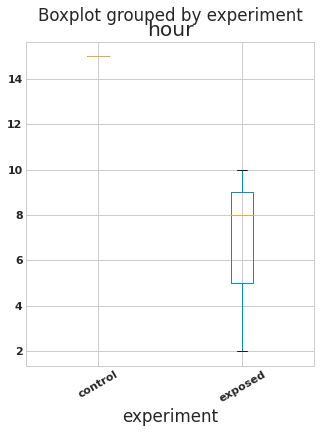

In [318]:
df.head().boxplot('hour','experiment',rot = 30,figsize=(5,6))


In [319]:
#users occurance in Ad on differnt hours

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


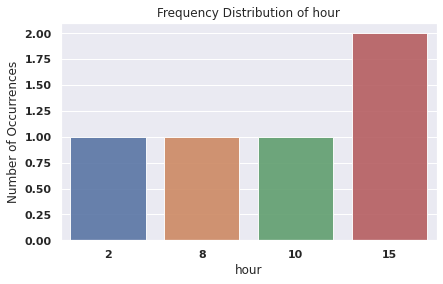

In [320]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
hour_count = df.head()['hour'].value_counts()
sns.set(style="darkgrid")
sns.barplot(hour_count.index, hour_count.values, alpha=0.9)
plt.title('Frequency Distribution of hour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.show()

In [321]:
# the classical p-value based algorithm

In [322]:
def pvalue_101(mu, sigma, samp_size, samp_mean=0, deltam=0):
    np.random.seed(1234)
    s1 = np.random.normal(mu, sigma, samp_size)
    if samp_mean > 0:
        print(len(s1[s1>samp_mean]))
        outliers = float(len(s1[s1>samp_mean])*100)/float(len(s1))
        print('Percentage of numbers larger than {} is {}%'.format(samp_mean, outliers))
    if deltam == 0:
        deltam = abs(mu-samp_mean)
    if deltam > 0 :
        outliers = (float(len(s1[s1>(mu+deltam)]))
                    +float(len(s1[s1<(mu-deltam)])))*100.0/float(len(s1))
        print('Percentage of numbers further than the population mean of {} by +/-{} is {}%'.format(mu, deltam, outliers))

    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Normal Distribution: population_mean={}'.format(mu) )
    plt.hist(s1)
    plt.axvline(x=mu+deltam, color='red')
    plt.axvline(x=mu-deltam, color='green')
    plt.show()

35
Percentage of numbers larger than 183.0 is 0.35%
Percentage of numbers further than the population mean of 170.0 by +/-13.0 is 0.77%


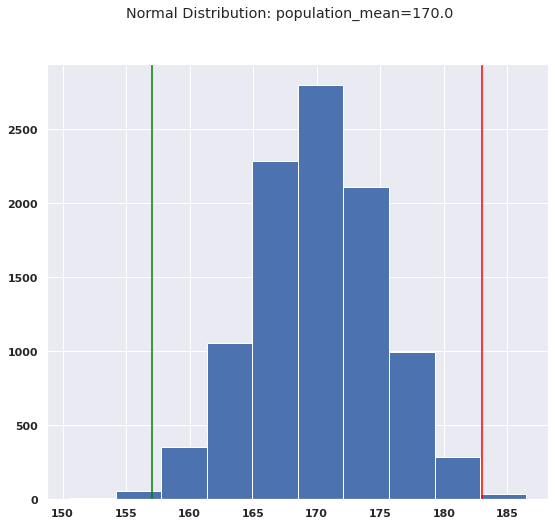

In [323]:
pvalue_101(170.0, 5.0, 10000, 183.0)

In [324]:
#A p-value of 0.35% will give the probability that we get a sample mean that is more than $183, given the hypothesis that the population mean is $170.
#A p-value of 0.77% will give the probability that we get a sample mean that is more than $183 or less than $157, given the hypothesis that the population mean is $170.

In [325]:
#the  sequential A/B testing algorithm 

In [326]:
from scipy import stats
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [327]:
get_power(1000, 0.1, 0.12, 0.95)   #  0.29808032538146
get_power(2000, 0.1, 0.12, 0.95)   #  0.524515256115834
get_power(1000, 0.1, 0.12, 0.8)    #  0.5621010118690234

0.5621010118690234

In [328]:
#the smaller the Beta, the bigger the power.


In [329]:
#Creating a contingency table with a summary of the observed outcomes
df=df.groupby('experiment').agg({'yes':'sum','no':'sum'})
df.loc['Total',:]=df.sum(axis=0)
df.loc[:,'Total']=df.sum(axis=1)
df.head()

,yes,no,Total
experiment,,,
control,264.0,322.0,586.0
exposed,308.0,349.0,657.0
Total,572.0,671.0,1243.0


In [ ]:
#Task 1.2

In [87]:
#Histogram
def plot_hist(df,col1):
    plt.figure(figsize=(10,8))
    plt.hist(df[col1],bins=20,color='#B0C485',edgecolor='#64894B',linewidth=0.5)
    plt.title(f'Histogram of {col1}', size=16,fontweight='bold')
    plt.show()
#Scatter plot
def plot_scatter(df,col1,col2):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=col1, y=col2, hue=col1, style=col1)
    plt.title(f'{col1} vs {col2}', size=16)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
def plot_count(df,col1,col2):
    plt.figure(figsize=(12,8))
    
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=col1,palette='summer')
    plt.title(f'Distribution of {col1}', size=16, fontweight='bold')
    plt.xticks(rotation=70)
    
    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col2,palette='summer_r')
    plt.title(f'Distribution of {col2}', size=16, fontweight='bold')
    plt.xticks(rotation=70)
    plt.show()

In [330]:
#Task 2.2: ML modelling with MLOps


In [331]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm


In [2]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



from keras import Sequential
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,CuDNNLSTM, GRU, CuDNNGRU, Embedding, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from sklearn.model_selection import KFold, cross_val_score, train_test_split

train = pd.read_csv('drive/MyDrive/AdSmartABdata.csv')
display(train.shape)

train.head()

(8077, 9)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
y= train.head().platform_os

In [8]:
x=train.head().drop('browser',axis=1)


In [9]:
x.head()

,auction_id,experiment,date,hour,device_make,platform_os,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,0,0


In [10]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: platform_os, dtype: int64

In [11]:
#train_test_split

In [16]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print("shape of original dataset :", train.head().shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (5, 9)
shape of input - training set (4, 8)
shape of output - training set (4,)
shape of input - testing set (1, 8)
shape of output - testing set (1,)


In [ ]:
# Split the data into 70% training, 20% validation, and 10% test sets.

In [19]:
from sklearn.model_selection import train_test_split

def train_test_validate_stratified_split(features, targets, test_size=0.1, validate_size=0.2):
    # Get test sets
    features_train, features_test, targets_train, targets_test = train_test_split(
        features,
        targets,
        stratify=targets,
        test_size=test_size
    )
    # Run train_test_split again to get train and validate sets
    post_split_validate_size = validate_size / (1 - test_size)
    features_train, features_validate, targets_train, targets_validate = train_test_split(
        features_train,
        targets_train,
        stratify=targets_train,
        test_size=post_split_validate_size
    )
    return features_train, features_test, features_validate, targets_train, targets_test, targets_validate
    print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (4, 8)
shape of output - training set (4,)
shape of input - testing set (1, 8)
shape of output - testing set (1,)


In [ ]:
#Train a machine learning model using 5-fold cross validation using Logistic Regression.



>1 mean=0.8650 se=0.008
>2 mean=0.8655 se=0.007
>3 mean=0.8660 se=0.005
>4 mean=0.8655 se=0.006
>5 mean=0.8646 se=0.005
>6 mean=0.8640 se=0.004
>7 mean=0.8637 se=0.004
>8 mean=0.8645 se=0.004
>9 mean=0.8647 se=0.003
>10 mean=0.8646 se=0.003
>11 mean=0.8643 se=0.003
>12 mean=0.8643 se=0.003
>13 mean=0.8648 se=0.003
>14 mean=0.8650 se=0.003
>15 mean=0.8651 se=0.003


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


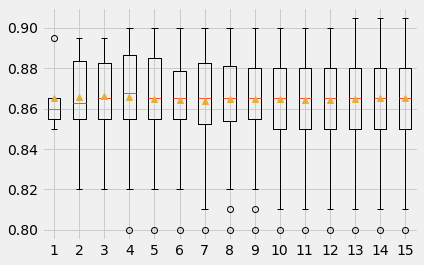

In [31]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [ ]:
# Repeated k-fold gives accuracy for our model

In [63]:
#Decision Trees
# It is effective in classifying complex datasets.

In [52]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [53]:
iris=load_iris()

In [54]:
print(iris.feature_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
print(iris.target_names) 

['setosa' 'versicolor' 'virginica']


In [58]:
['setosa' 'versicolor' 'virginica']

['setosaversicolorvirginica']

In [59]:
#Spilitting the dataset
removed =[0,50,100]
new_target = np.delete(iris.target,removed)
new_data = np.delete(iris.data,removed, axis=0)

In [60]:
#train classifier
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(new_data,new_target) # train data on new data and new target
prediction = clf.predict(iris.data[removed]) #  assign removed data as input

In [61]:
print("Original Labels",iris.target[removed])
print("Labels Predicted",prediction)

Original Labels [0 1 2]
Labels Predicted [0 1 2]


[Text(187.92, 213.84, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [49, 49, 49]'),
 Text(159.00923076923075, 174.95999999999998, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(216.83076923076922, 174.95999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 98\nvalue = [0, 49, 49]'),
 Text(115.64307692307692, 136.07999999999998, 'X[2] <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(57.82153846153846, 97.19999999999999, 'X[3] <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]'),
 Text(28.91076923076923, 58.31999999999999, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(86.73230769230769, 58.31999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(173.46461538461537, 97.19999999999999, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(144.55384615384614, 58.31999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(202.3753846153846, 58.31999999999999, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1

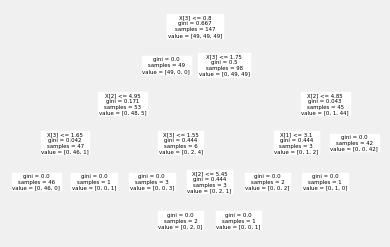

In [62]:
tree.plot_tree(clf)

In [ ]:
#XGBoost
#It merge several weak learning models together to produce a strong predictive model

In [111]:
>>> from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier

>>> X, y = make_hastie_10_2(random_state=0)
>>> X_train, X_test = X[:2000], X[2000:]
>>> y_train, y_test = y[:2000], y[2000:]

>>> clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.913

In [112]:
>>> import numpy as np
>>> from sklearn.metrics import mean_squared_error
>>> from sklearn.datasets import make_friedman1
>>> from sklearn.ensemble import GradientBoostingRegressor

>>> X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
>>> X_train, X_test = X[:200], X[200:]
>>> y_train, y_test = y[:200], y[200:]
>>> est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
...     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
>>> mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

In [113]:
>>> _ = est.set_params(n_estimators=200, warm_start=True)  # set warm_start and new nr of trees
>>> _ = est.fit(X_train, y_train) # fit additional 100 trees to est
>>> mean_squared_error(y_test, est.predict(X_test))

3.840234741105356

In [114]:
>>> from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier

>>> X, y = make_hastie_10_2(random_state=0)
>>> clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X, y)
>>> clf.feature_importances_

array([0.10684213, 0.10461707, 0.11265447, 0.09863589, 0.09469133,
       0.10729306, 0.09163753, 0.09718194, 0.09581415, 0.09063242])

In [124]:
pip install django


In [127]:
def process_bill(bill_type, liquor_license, cost_centre, account_number_list, description, license_category,user,amount,schedule_type):
    from models import LiquorCostCentre, LiqourBillTrack
    cost_centre_obj, _ = LiquorCostCentre.objects.get_or_create(cost_centre_id=cost_centre)
    bill = LiqourBillTrack.objects.create(
        fee_choice=schedule_type,
        bill_type=bill_type,
        cost_centre=cost_centre_obj.cost_centre_id,
        balance=float(              amount),
        description=description,
        created_by=user,
        year=CURRENT_YEAR,
        liquor_license= liquor_license

    )
    [bill.accounts.add(account_number) for account_number in account_number_list]
    account_values = []
    account_list = bill.accounts.all()
    account_total = [account_values.append(acc_value.amount) for acc_value in account_list ]

    bill_total =sum(account_values)
    bill.total = bill_total
    bill.balance = bill_total
    bill.ref_no = 'LIQ-' + str(NOW.year) + str(NOW.month)+ str(bill.id)
    bill.bill_no = bill.ref_no
    bill.save()
    return bill

In [ ]:
#######  End ######